## Discrete Fourier Transform

In [1]:
import numpy as np
import matplotlib.pyplot as plt

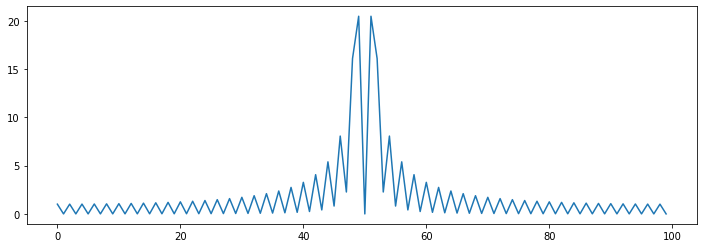

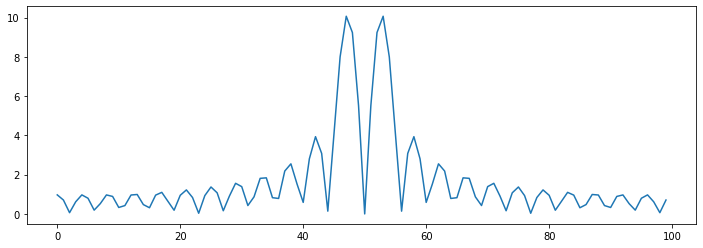

In [2]:
N = 100
x1 = np.linspace(-2,2,100)
y1 = np.zeros(100,complex)
y1[abs(x1)<1] = x1[abs(x1)<1]
c1 = np.zeros(N,complex)
n1 = np.arange(len(y1))
for k1 in range(N):
    output1 = y1[n1]*np.exp(-2j*np.pi*k1*n1/N)
    c1[k1] = np.sum(output1)
plt.figure(figsize=(12,4))
#plt.subplot(4,3,1)
#plt.plot(np.imag(c),label="imag")
#plt.plot(np.real(c),label="real")
#plt.plot(abs(c1),'r',label="magnitude")
C1 = np.fft.fftshift(c1)
plt.plot(abs(C1), label="y1")

x2 = np.linspace(-4,4,100)
y2 = np.zeros(100,complex)
y2[abs(x2)<1] = x2[abs(x2)<1]
c2 = np.zeros(N,complex)
n2 = np.arange(N)
for k2 in range(N):
    output2 = y2[n2]*np.exp(-2j*np.pi*k2*n2/N)
    c2[k2] = np.sum(output2)
plt.figure(figsize=(12,4))
#plt.subplot(2,2,3)
#plt.plot(abs(c2),'r',label='magnitude')
C2 = np.fft.fftshift(c2)
plt.plot(abs(C2), label = "y2")

## Linearity Property

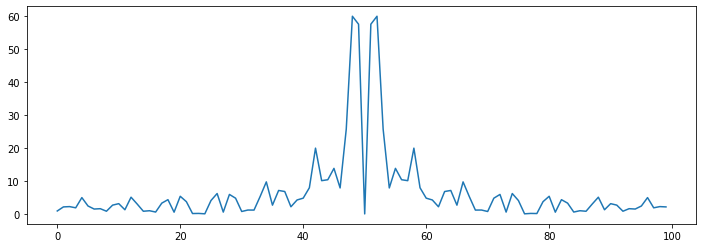

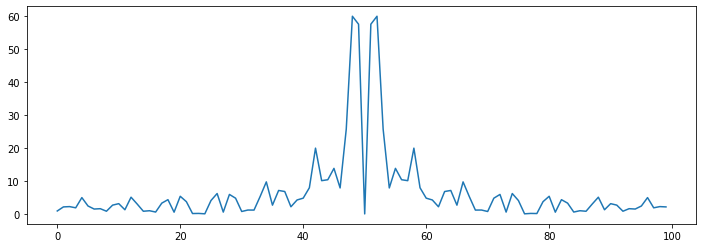

In [3]:
a1 = 2
a2 = 3
x1 = np.linspace(-2,2,100)
y1 = np.zeros(100,complex)
y1[abs(x1)<1] = x1[abs(x1)<1]
y1 = a1*y1
x2 = np.linspace(-4,4,100)
y2 = np.zeros(100,complex)
y2[abs(x2)<1] = x2[abs(x2)<1]
y2 = a2*y2
y = y1+y2
c = np.zeros(N,complex)
n = np.arange(N)
for k in range(N):
    output =  y[n]*np.exp(-2j*np.pi*k*n/N)
    c[k] = np.sum(output)
plt.figure(figsize=(12,4))
C = np.fft.fftshift(c)
plt.plot(abs(C),label="magnitude")
Z1 = a1*C1
Z2 = a2*C2
Z = Z1+Z2
q = np.zeros(N,complex)
n = np.arange(N)
for e in range(N):
    output_ = y[n]*np.exp(-2j*np.pi*e*n/N)
    q[e] = np.sum(output_)
plt.figure(figsize=(12,4))
Q = np.fft.fftshift(q)
plt.plot(abs(Q),label='magnitude')

## Time Shifting Property

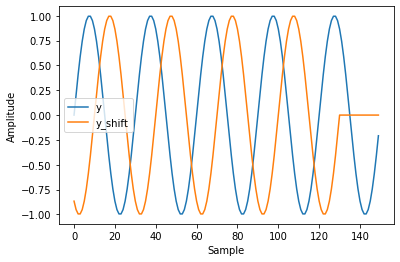

In [4]:
def nextpow2(i):
    '''
    Find the next power 2 number for FFT
    '''
    
    n = 1
    while n < i: n *= 2
    return n

def shift_signal_in_frequency_domain(datin, shift):
    '''
    This is function to shift a signal in frequency domain. 
    The idea is in the frequency domain, 
    we just multiply the signal with the phase shift. 
    '''
    Nin = len(datin) 
    
    # get the next power 2 number for fft
    N = nextpow2(Nin +np.max(np.abs(shift)))
    
    # do the fft
    fdatin = np.fft.fft(datin, N)
    
    # get the phase shift for the signal, shift here is D in the above explaination
    ik = np.array([2j*np.pi*k for k in range(0, N)]) / N 
    fshift = np.exp(-ik*shift)
        
    # multiple the signal with the shift and transform it back to time domain
    datout = np.real(np.fft.ifft(fshift * fdatin))
    
    # only get the data have the same length as the input signal
    datout = datout[0:Nin]
    
    return datout
Fs = 150.0;  # sampling rate
Ts = 1.0/Fs; # sampling interval
t = np.arange(0,1,Ts) # time vector

ff = 5;   # frequency of the signal

# let's generate a sine signal
y = np.sin(2*np.pi*ff*t)

# shift the signal in the frequency domain by 20 samples
y_shift = shift_signal_in_frequency_domain(y, -20)

plt.plot(y, label = 'y')
plt.plot(y_shift, label = 'y_shift')
plt.xlabel('Sample')
plt.ylabel('Amplitude')
plt.legend()
plt.show()

## Multiplication by an Exponential sequence

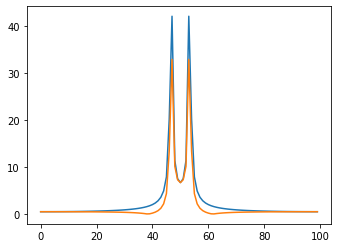

In [5]:
N = 100
x1 = np.arange(0,1,1/150)
y1 = np.sin(2*np.pi*5*x1)
c1 = np.zeros(N,complex)
n1 = np.arange(N)
for k1 in range(N):
    output1 = y1[n1]*np.exp(-2j*np.pi*k1*n1/N)
    c1[k1] = np.sum(output1)
df_t = np.fft.fft(y1,N)
plt.figure(figsize=(12,4))
#plt.subplot(4,3,1)
#plt.plot(np.imag(c),label="imag")
#plt.plot(np.real(c),label="real")
#plt.plot(abs(c1),'r',label="magnitude")
C1 = np.fft.fftshift(df_t)
plt.subplot(121)
#ik = np.array([2j*np.pi*k for k in range(0, N)])/ N 
m = np.exp(-2j*np.pi*n1/N)
#fshift = np.exp(-ik*shift)
datout1 = np.real(C1*m)
plt.plot(abs(C1), label="C1")
plt.plot(abs(datout1), label="y1")
b = np.fft.fft(y1)

## Circular Time Shift Property of DFT

Original Series
[0, 6, 8, 10, 12, 14, 16, 22, 26, 28]
Shifted Series
[12, 14, 16, 22, 26, 28, 0, 6, 8, 10]
Now we will calculate there DFT


C:\Users\DELL\Anaconda3\envs\tensorflow_env\lib\site-packages\ipykernel_launcher.py:13: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  del sys.path[0]
C:\Users\DELL\Anaconda3\envs\tensorflow_env\lib\site-packages\ipykernel_launcher.py:16: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  app.launch_new_instance()
C:\Users\DELL\Anaconda3\envs\tensorflow_env\lib\site-packages\ipykernel_launcher.py:22: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollecti

Text(0.5, 1.0, 'Shifted Phase')

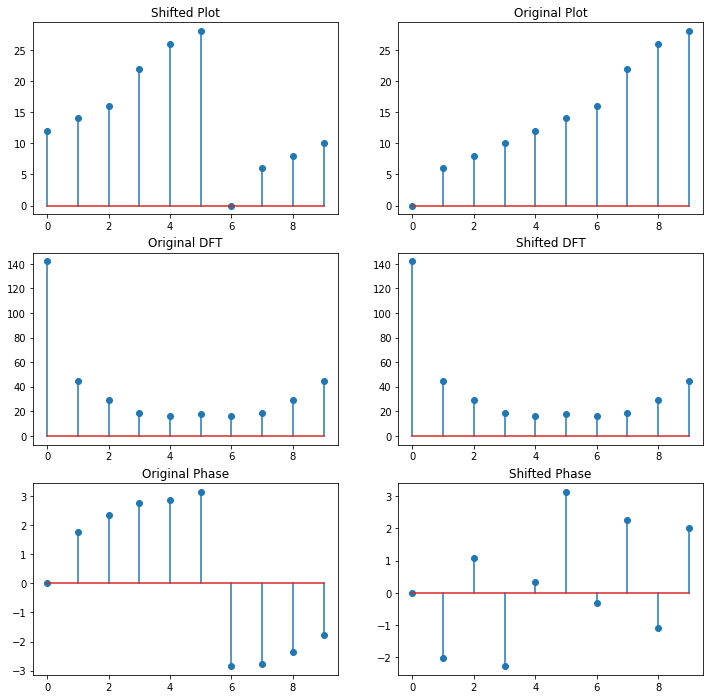

In [6]:
import random
random_numb = random.sample(range(0,30,2),10)
random_numb.sort()
print("Original Series")
print(random_numb)
N = len(random_numb)
n = np.arange(N)
print("Shifted Series")
random_numb_shifted = random_numb[4::]+random_numb[:4:]
print(random_numb_shifted)
plt.figure(figsize=(12,12))
plt.subplot(321)
plt.stem(n,random_numb_shifted)
plt.title("Shifted Plot")
plt.subplot(322)
plt.stem(n,random_numb)
plt.title("Original Plot")
print("Now we will calculate there DFT")
X = np.fft.fft(random_numb)
Y = np.fft.fft(random_numb_shifted)
plt.subplot(323)
plt.stem(n,abs(X))
plt.title("Original DFT")
plt.subplot(324)
plt.stem(n,abs(Y))
plt.title("Shifted DFT")
plt.subplot(325)
plt.stem(n,np.angle(X))
plt.title("Original Phase")
plt.subplot(326)
plt.stem(n,np.angle(Y))
plt.title("Shifted Phase")

## Conjugation Property of DFT

[1, 3, 5, 7, 9, 11, 13, 15, 17, 19]


C:\Users\DELL\Anaconda3\envs\tensorflow_env\lib\site-packages\ipykernel_launcher.py:10: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  # Remove the CWD from sys.path while we load stuff.
C:\Users\DELL\Anaconda3\envs\tensorflow_env\lib\site-packages\ipykernel_launcher.py:14: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  


<StemContainer object of 3 artists>

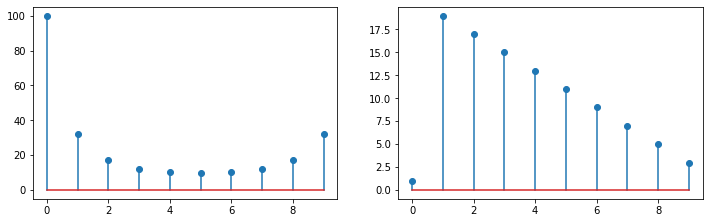

In [7]:
import random
x = random.sample(range(1,20,2),10)
x.sort()
print(x)
N = len(x)
n = np.arange(N)
X = np.fft.fft(x)
plt.figure(figsize=(12,12))
plt.subplot(3,2,1)
plt.stem(n,abs(X))
x1 = np.conj(X)
X1 = np.fft.ifft(x1)
plt.subplot(322)
plt.stem(n,abs(X1))

## Frequency Shifting Property 

In [8]:
t = np.arange(-10,10,1/100)
def gauss(t):    
    g = np.exp(-t*t)
    return g

In [9]:
def dft(y):
    n = np.linspace(-2,2,len(y))
    X = np.fft.fftshift(np.fft.fft(y))
    return X

<Figure size 432x288 with 0 Axes>

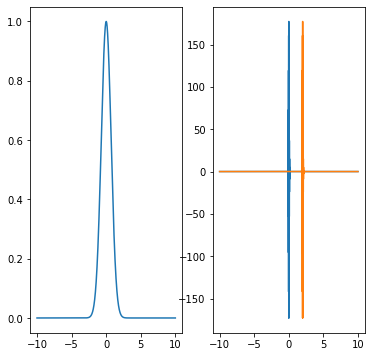

In [10]:
x = gauss
X = dft(x(t))
plt.gcf().clear()
plt.figure(figsize=(6,6))
plt.subplot(121)
plt.plot(t,x(t))
xf0 = lambda t: np.exp(2j*np.pi*10*t)*x(t)
plt.subplot(122)
Xf0 = dft(xf0(t))
plt.plot(t,X.real)
plt.plot(t,Xf0.real)

## Convolutional Property

ValueError: operands could not be broadcast together with shapes (399,) (200,) 

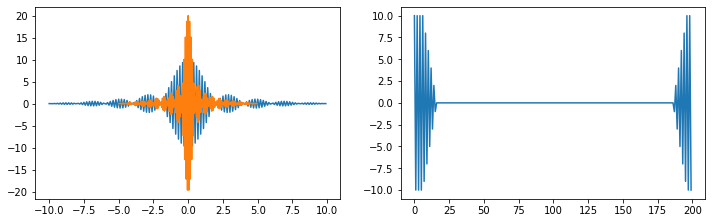

In [33]:
from scipy import signal
t1 = np.arange(-10,10,1/2)
t2 = np.arange(-5,5,1/4)

def rect(t):
    s = (abs(t)<=0.5).astype(float)
    return s
def dft_(y,t):
    X = np.fft.fftshift(np.fft.fft(y,t))
    return X
x1 = rect(w1)
X1 = dft_(x1,len(w1))
x2 = rect(w2)
X2 = dft_(x2,len(w2))
X  = X1*X2
xn = np.fft.ifft(X)
plt.figure(figsize=(12,12))
plt.subplot(321)
plt.plot(t1,X1, label="X1")
plt.plot(t2,X2, label="X2")
Y = signal.fftconvolve(x1(t1),x2(t2))
plt.subplot(322)
plt.plot(X)

np.allclose(Y,X)

## Parseval's Relation

10.0
10.0
0.0
Hence Proved


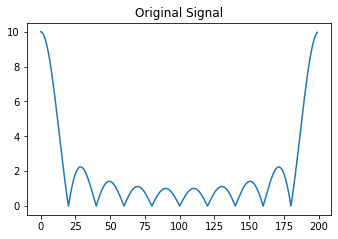

In [12]:
t = np.arange(-10,10,1/10)
def rect(t):
    s=(abs(t)<0.5).astype(float)
    return s
N = len(t)
def dft_p(y):
    X = np.fft.fft(y)
    return X
x = rect
X = dft_p(x(t))
plt.figure(figsize=(12,12))
plt.subplot(321)
plt.plot(abs(X))
plt.title("Original Signal")
P1 = np.sum(x(t)**2)
P2 = np.sum(np.abs(X**2))/N
print(P1)
print(P2)
print(P1-P2)
print("Hence Proved")

## Differentiation Property of DFT

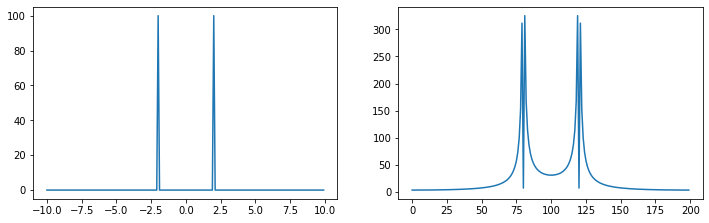

In [13]:
t = np.arange(-10,10,1/10)
def sin_(t):
    X = np.sin(np.pi*t*2)
    return X
def def_d(y):
    X = np.fft.fftshift(np.fft.fft(y))
    return X
x = sin_
X = def_d(x(t))
plt.figure(figsize=(12,12))
plt.subplot(321)
plt.plot(t,abs(X))
y = sin_
Y = def_d(t*y(t))
plt.subplot(322)
plt.plot(abs(Y))

## Multiplication Property

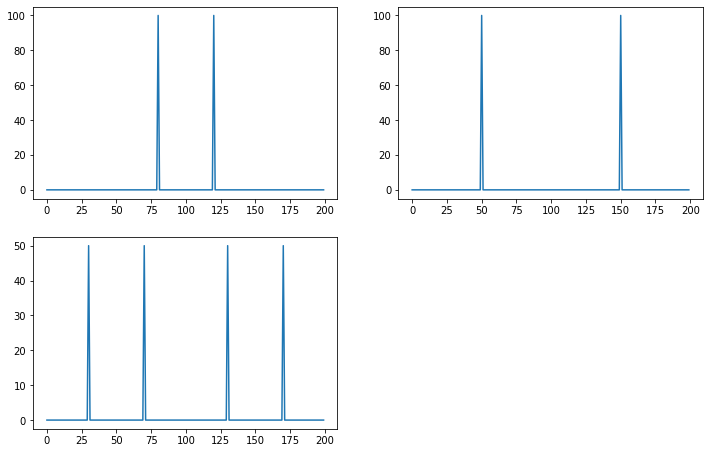

In [14]:
t1 = np.arange(-10,10,1/10)
def sin_1(t):
    X = np.sin(np.pi*t1*2)
    return X
def def_m(y):
    X = np.fft.fftshift(np.fft.fft(y))
    return X
def sin_2(t):
    X = np.cos(np.pi*t1*5)
    return X
x1 = sin_1(t1)
X1 = def_m(x1)
x2 = sin_2(t1)
X2 = def_m(x2)
plt.figure(figsize=(12,12))
plt.subplot(321)
plt.plot(abs(X1))
plt.subplot(322)
plt.plot(abs(X2))
Y = x1*x2
y1 = def_m(Y)
plt.subplot(323)
plt.plot(abs(y1))